# Data Analysis

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [60]:
# read csv files
combined_df = pd.read_csv('clean_data/combined_gas_and_temp.csv')
combo_pop = pd.read_csv('clean_data/combined_w_pop.csv')

In [61]:
# droping the extra index column that gets added from importing csv
combined_df.drop(columns='Unnamed: 0', inplace=True)
combo_pop.drop(columns='Unnamed: 0', inplace=True)

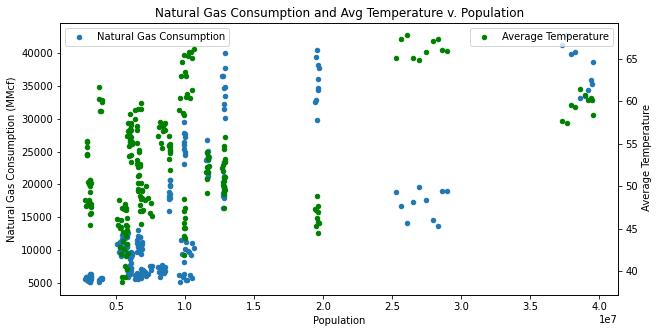

In [15]:
# plot gas consumption first
ax1 = combo_pop.plot(kind='scatter', x='Population', y='Natural Gas Consumption (MMcf)', figsize=(10, 5), label='Natural Gas Consumption')
# add twin axis and set the position of y ticks for temperature data
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
# plot temperature data
combo_pop.plot(kind='scatter', ax=ax2, x='Population', y=' Average Temperature', color='green', label='Average Temperature')

# set title, legend, and save figure to png
title = ax1.set_title('Natural Gas Consumption and Avg Temperature v. Population')
leg = ax1.legend()
fig = ax1.get_figure()
fig.savefig('output_data/gas_and_temp_v_population.png')

# Linear Regression Models

In [16]:
# function to plot linear regressions
def plotLinRegress(x, y, xlabel, ylabel, labelpos, title, image_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is: {rvalue**2}')
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, labelpos, fontsize=15, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(f'output_data/{image_name}.png')

The r-squared is: 0.007137961012774231


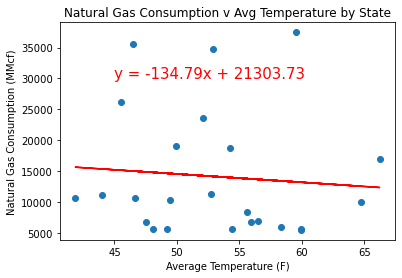

In [40]:
# get the averages over a 10 year period
state_mean = combo_pop.groupby('State').mean()

xlabel = 'Average Temperature (F)'
ylabel = 'Natural Gas Consumption (MMcf)'
title = 'Natural Gas Consumption v Avg Temperature by State'
labelpos = (45, 30000)
image_name = 'gas_usage_v_temp_by_state'

plotLinRegress(state_mean[' Average Temperature'], state_mean['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.15178578510370927


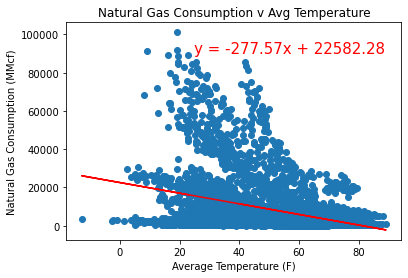

In [41]:
xlabel = 'Average Temperature (F)'
ylabel = 'Natural Gas Consumption (MMcf)'
labelpos = (25,90000)
title = 'Natural Gas Consumption v Avg Temperature'
image_name = 'gas_usage_v_temp_total'

plotLinRegress(combined_df[' Average Temperature'], combined_df['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos,title, image_name)

The r-squared is: 0.5111068269975281


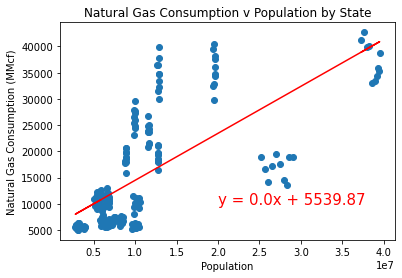

In [43]:
xlabel = 'Population'
ylabel = 'Natural Gas Consumption (MMcf)'
labelpos = (20000000, 10000)
title = 'Natural Gas Consumption v Population by State'
image_name = 'gas_usage_v_pop'

plotLinRegress(combo_pop['Population'], combo_pop['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.08072897389874309


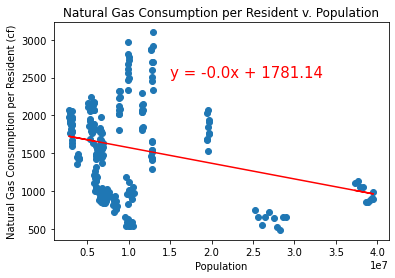

In [45]:
xlabel = 'Population'
ylabel = 'Natural Gas Consumption per Resident (cf)'
labelpos = (15000000, 2500)
title = 'Natural Gas Consumption per Resident v. Population'
image_name = 'gas_usage_per_person'
y = (combo_pop['Gas Usage Per Person (MMcf)']) * 1000000 # changes unit from million cubic feet to just cubic feet
plotLinRegress(combo_pop['Population'], y , xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.43761009790107624


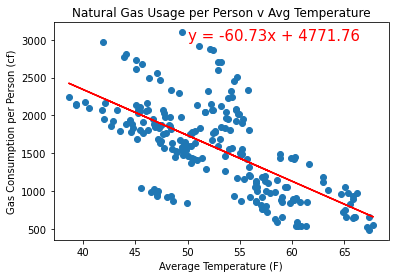

In [47]:
xlabel = 'Average Temperature (F)'
ylabel = 'Gas Consumption per Person (cf)'
labelpos = (50, 3000)
title = 'Natural Gas Usage per Person v Avg Temperature'
image_name = 'gas_usage_per_person_v_temp'
y = (combo_pop['Gas Usage Per Person (MMcf)']) * 1000000 # changes unit from million cubic feet to just cubic feet
plotLinRegress(combo_pop[' Average Temperature'], y, xlabel, ylabel, labelpos, title, image_name)

# Grouping States by Standard Federal Regions via .loc

In [52]:
Region_I= combined_df.loc[(combined_df['State']== 'Connecticut') | (combined_df['State']== 'Massachusetts')]

Region_II= combined_df.loc[(combined_df['State']== 'New Jersey') | (combined_df['State']== 'New York')]

Region_III= combined_df.loc[(combined_df['State']== 'Maryland') | (combined_df['State']== 'Pennsylvania') | (combined_df['State']== 'Virginia') | (combined_df['State']== 'West Virginia')]

Region_IV= combined_df.loc[(combined_df['State']== 'Alabama') | (combined_df['State']== 'Georgia') | (combined_df['State']== 'Kentucky') | (combined_df['State']== 'Mississippi') |(combined_df['State']== 'North Carolina') |(combined_df['State']== 'South Carolina') | (combined_df['State']=='Tennessee')]

Region_V = combined_df.loc[(combined_df['State']== 'Illinois') | (combined_df['State']== 'Indiana') | (combined_df['State']=='Michigan') | (combined_df['State']=='Minnesota')| (combined_df['State']=='Ohio') |( combined_df['State']== 'Wisconsin')]

Region_VI=combined_df.loc[(combined_df['State']== 'Arkansas') | (combined_df['State']== 'Louisiana') | (combined_df['State']== 'New Mexico') | (combined_df['State']=='Oklahoma') |(combined_df['State']=='Texas')]

Region_VII=combined_df.loc[(combined_df['State']== 'Iowa') | (combined_df['State']== 'Kansas') |(combined_df['State']=='Missouri')]

Region_VIII=combined_df.loc[(combined_df['State']== 'Colorado') | (combined_df['State']== 'Utah')]

Region_IX=combined_df.loc[(combined_df['State']== 'Arizona') | (combined_df['State']== 'California')]

Region_X= combined_df.loc[(combined_df['State']== 'Idaho') | (combined_df['State']== 'Oregon') | (combined_df['State']=='Washington')]

In [53]:
reg_I_gas= Region_I['Natural Gas Consumption (MMcf)'].mean()
reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
reg_III_gas= Region_III['Natural Gas Consumption (MMcf)'].mean()
reg_IV_gas= Region_IV['Natural Gas Consumption (MMcf)'].mean()
reg_V_gas= Region_V['Natural Gas Consumption (MMcf)'].mean()
reg_VI_gas= Region_VI['Natural Gas Consumption (MMcf)'].mean()
reg_VII_gas= Region_VII['Natural Gas Consumption (MMcf)'].mean()
reg_VIII_gas= Region_VIII['Natural Gas Consumption (MMcf)'].mean()
reg_IX_gas= Region_IX['Natural Gas Consumption (MMcf)'].mean()
reg_X_gas= Region_X['Natural Gas Consumption (MMcf)'].mean()

In [54]:
reg_name=('1','2','3','4','5','6','7','8','9','10')
reg_CCmf=([reg_I_gas,reg_II_gas,reg_III_gas,reg_IV_gas,reg_V_gas,reg_VI_gas,reg_VII_gas,reg_VIII_gas,reg_IX_gas,reg_X_gas])

In [55]:
rgtest_df=pd.DataFrame({'Region': reg_name, 'Ave MMcf': reg_CCmf})
rgtest_df

,Region,Ave MMcf
0,1,7152.113017
1,2,27217.269633
2,3,8691.478602
3,4,4638.058565
4,5,19631.580435
5,6,6149.143780
6,7,6390.762406
7,8,8080.370717
8,9,20251.557808
9,10,4196.686031


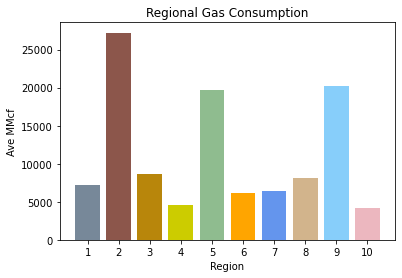

In [56]:
plt.bar(reg_name, reg_CCmf, color=["lightslategrey","tab:brown","darkgoldenrod","#CCCC00","darkseagreen","orange","cornflowerblue",'tan','lightskyblue','#ecb7bf'])
plt.ylabel('Ave MMcf')
plt.xlabel('Region')
plt.title("Regional Gas Consumption")
plt.show()

# Looking at gas consumption by season

In [62]:
combined_df[['Year','Month']]= combined_df.Date.str.split("-",expand=True)
combined_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,2010-01,Alabama,9202.647,40.0,-4.9,2010,01
1,2010-02,Alabama,7762.261,40.6,-9.2,2010,02
2,2010-03,Alabama,6612.051,51.2,-5.0,2010,03
3,2010-04,Alabama,2987.217,64.2,0.3,2010,04
4,2010-05,Alabama,1142.784,73.3,1.7,2010,05
...,...,...,...,...,...,...,...
5875,2019-08,Wyoming,212.409,64.9,0.3,2019,08
5876,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5877,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5878,2019-11,Wyoming,1847.274,30.2,-0.9,2019,11


In [64]:
spring_loc= combined_df.loc[(combined_df['Month']== '03')|(combined_df['Month']== '04')|(combined_df['Month']== '05')]
summer_loc=  combined_df.loc[(combined_df['Month']== '06')|(combined_df['Month']== '07')|(combined_df['Month']== '08')]
fall_loc=  combined_df.loc[(combined_df['Month']== '09')|(combined_df['Month']== '10')|(combined_df['Month']== '11')]
winter_loc=  combined_df.loc[(combined_df['Month']== '12')|(combined_df['Month']== '01')|(combined_df['Month']== '02')]

In [65]:
spring = spring_loc['Natural Gas Consumption (MMcf)'].mean()
summer = summer_loc['Natural Gas Consumption (MMcf)'].mean()
fall = fall_loc['Natural Gas Consumption (MMcf)'].mean()
winter = winter_loc['Natural Gas Consumption (MMcf)'].mean()

In [66]:
season_name=("Spring","Summer","Fall","Winter")
season_MMcf=([spring, summer, fall, winter])

In [67]:
season_df= pd.DataFrame({"Season":season_name,"Ave MMcF":season_MMcf})
season_df

,Season,Ave MMcF
0,Spring,7613.320118
1,Summer,2310.646471
2,Fall,5564.491110
3,Winter,16405.638815


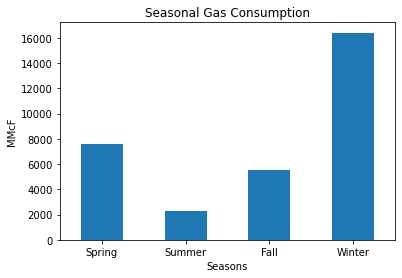

In [71]:
season_bar = season_df.plot.bar(legend=False, title= "Seasonal Gas Consumption",rot=0)
xlabel = season_bar.set_xlabel("Seasons")
ylabel = season_bar.set_ylabel("MMcF")
tick_labels = season_bar.set_xticklabels(season_name)

In [72]:
#doing groubpy for boxplot

spring_box_data = spring_loc['Natural Gas Consumption (MMcf)']
summer_box_data = summer_loc['Natural Gas Consumption (MMcf)']
fall_box_data = fall_loc['Natural Gas Consumption (MMcf)']
winter_box_data = winter_loc['Natural Gas Consumption (MMcf)']

In [73]:
ss_box_df= pd.DataFrame({"Spring":spring_box_data, "Summer":summer_box_data, "Fall": fall_box_data, "Winter": winter_box_data})
ss_box_df.fillna(" ")

,Spring,Summer,Fall,Winter
0,,,,9202.65
1,,,,7762.26
2,6612.05,,,
3,2987.22,,,
4,1142.78,,,
...,...,...,...,...
5875,,212.409,,
5876,,,189.987,
5877,,,589.805,
5878,,,1847.27,


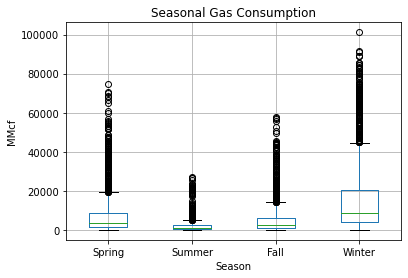

In [74]:
season_box=ss_box_df.boxplot()
title = season_box.set_title("Seasonal Gas Consumption")
xlabel = season_box.set_xlabel("Season")
ylabel = season_box.set_ylabel("MMcf")

Text(0.5, 1.0, 'Average Gas Consumption vs Average Temperature per State')

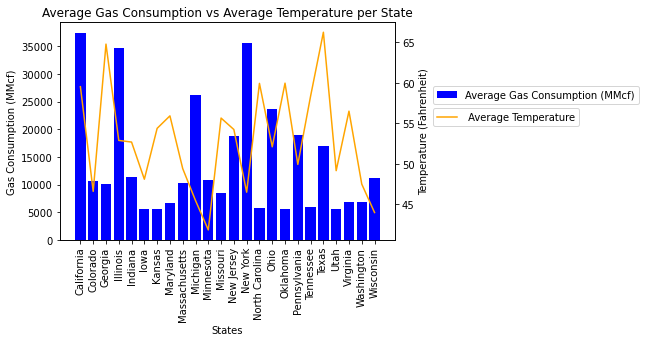

In [80]:
#ax = data_plot.add_subplot()
fig,ax1 = plt.subplots()
ax1.bar(state_mean.index, state_mean["Natural Gas Consumption (MMcf)"], color = 'blue', label="Average Gas Consumption (MMcf)")

ax1.set_xlabel("States")
ax1.set_ylabel("Gas Consumption (MMcf)")
plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.6))
ax2 = ax1.twinx()


ax2.set_ylabel("Temperature (Fahrenheit)")

ax2.plot(state_mean.index, state_mean[" Average Temperature"], color="orange", label = " Average Temperature")
plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.5))
ax1.tick_params(axis='x', rotation=90)
plt.title("Average Gas Consumption vs Average Temperature per State")